# **Maestria en Ingenieria Economica - Universidad Nacional de Ingenieria**

---

### Curso: _Macroeconomia_

### Profesor (_TA_): _Rodney Menezes_ 

### Tema: _Modelo RBC Basico (Python)_

### Fecha: _07/10/2023_

---

## El Modelo Real Business Cycle (RBC)

El modelo Real Business Cycle (RBC) es un modelo macroeconómico que explica las fluctuaciones económicas (ciclos económicos) a través de cambios en la productividad tecnológica. 

Este modelo se basa en la teoría neoclásica de crecimiento y se caracteriza por el uso de la función de producción Cobb-Douglas, decisiones intertemporales de los agentes y la presencia de choques tecnológicos.

### Especificaciones del Modelo

El modelo que hemos codificado en Python se basa en las siguientes especificaciones:

- La función de producción Cobb-Douglas es de la forma $Y_t = Z_t K_t^\alpha$, donde $Y_t$ es la producción, $K_t$ es el capital, $Z_t$ es el nivel de tecnología, y $\alpha$ es la elasticidad de la producción respecto al capital.
- El modelo utiliza una tasa de depreciación del capital, $\delta$, y un factor de descuento, $\beta$.
- Los choques tecnológicos siguen un proceso AR(1): $Z_{t+1} = \rho Z_t + \epsilon_{t+1}$, donde $\rho$ es el coeficiente de persistencia y $\epsilon_{t+1}$ es un término de choque normalmente distribuido.


### Estado Estacionario 

El estado estacionario del modelo se caracteriza por los valores de capital, consumo y producción que no cambian con el tiempo. Se calcula de la siguiente manera:

$K_{ss} =$ $\left(\frac{1 / \beta - 1 + \delta}{\alpha}\right)^{\frac{1}{\alpha - 1}}$

$Y_{ss} =$ $Z_{ss} K_{ss}^\alpha$
    
$C_{ss} =$ $Y_{ss} - \delta K_{ss}$
    
donde $K_{ss}, Y_{ss}, C_{ss}$ y $Z_{ss}$ son los valores de estado estacionario del capital, producción, consumo y tecnología, respectivamente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
alpha = 0.35  # Elasticidad de la producción respecto al capital
beta = 0.96   # Factor de descuento
delta = 0.05  # Tasa de depreciación del capital
rho = 0.9     # Persistencia del shock tecnológico
sigma = 0.02  # Desviación estándar del shock tecnológico

# Función de producción Cobb-Douglas
def production(k, z):
    return z * k**alpha

# Función de estado estacionario
def steady_state():
    k_ss = ((1 / beta - 1 + delta) / alpha)**(1 / (alpha - 1))
    z_ss = 1  # Estado estacionario de la tecnología
    y_ss = production(k_ss, z_ss)
    c_ss = y_ss - delta * k_ss
    return k_ss, c_ss, y_ss, z_ss

# Shock tecnológico
def technology_shock(z_prev, shock=0):
    return rho * z_prev + shock


In [2]:
# Simular el modelo
T = 40  # Periodos de tiempo
shock_period = 5  # Periodo en el que ocurre el shock
shock_size = 0.1  # Tamaño del shock

# Estado inicial
k_ss, c_ss, y_ss, z_ss = steady_state()
k, z = k_ss, z_ss
k_path = [k]
c_path = [c_ss]
y_path = [y_ss]

# Simulación
for t in range(1, T):
    if t == shock_period:
        z = technology_shock(z, shock_size)
    else:
        z = technology_shock(z)
    y = production(k, z)
    c = y - delta * k  # Consumo (aproximación simple)
    k = beta * alpha * z * k**alpha  # Capital para el próximo periodo (aproximación simple)

    k_path.append(k)
    c_path.append(c)
    y_path.append(y)


### Simulación y Respuesta a Choques

En la simulación, se observa cómo el modelo responde a un choque tecnológico transitorio. 

El análisis de impulso-respuesta muestra cómo variables clave como el capital, el consumo y la producción responden a lo largo del tiempo después del choque.

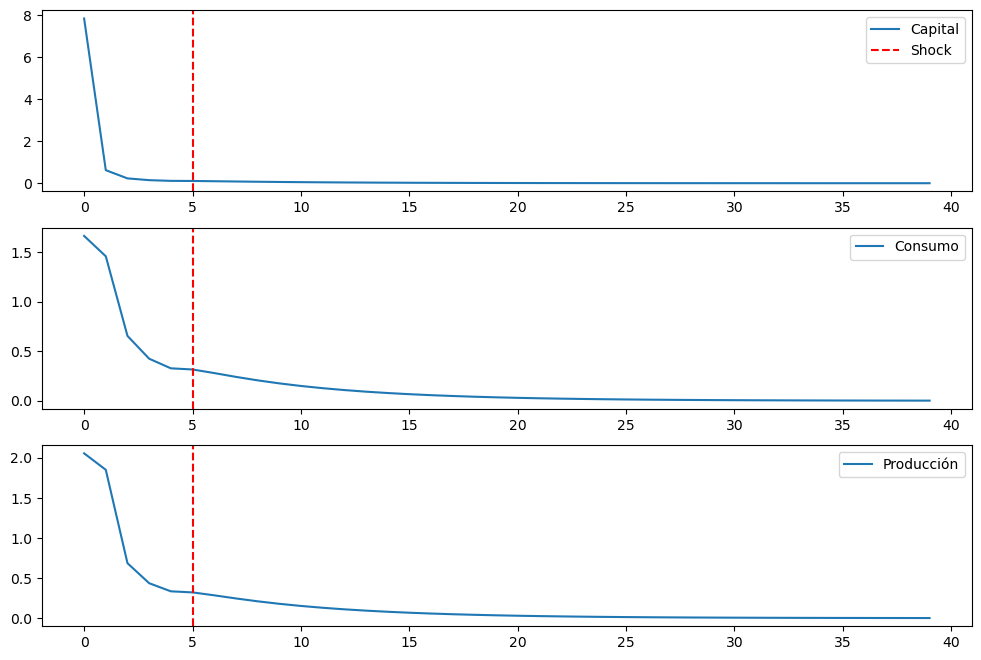

In [3]:
# Graficar Impulso Respuesta
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(k_path, label='Capital')
plt.axvline(x=shock_period, color='red', linestyle='--', label='Shock')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(c_path, label='Consumo')
plt.axvline(x=shock_period, color='red', linestyle='--')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(y_path, label='Producción')
plt.axvline(x=shock_period, color='red', linestyle='--')
plt.legend()
plt.show()